#Critical CSTR for the 3D BTX system

##Python imports
We shall use the `Sympy` package to perform the symbolic computations.

In [3]:
import sympy
sympy.init_printing(use_unicode=False, wrap_line=False)

##Define Sympy symbols, kinetics and DSR mixing point

In [13]:
cB,cE,cT,cX,cD,cH = sympy.symbols('cB, cE, cT, cX, cD, cH')
k1,k2,k3 = sympy.symbols('k1, k2, k3')

##BTX example
k1=1;
k2=1;
k3=10;
rB = -k1*cB*sympy.sqrt(cE) - 2*k3*cB**2
rE = -0.5*k1*cB*sympy.sqrt(cE) - 0.5*k2*cT*sympy.sqrt(cE)
rT = k1*cB*sympy.sqrt(cE) - k2*cT*sympy.sqrt(cE)
rX = k2*cT*sympy.sqrt(cE)
rD = k3*cB**2
rH = k3*cB**2

r = sympy.Matrix([rB, rE, rT, rX, rD, rH])
A_bar = sympy.Matrix([[-1, -0.5, 1, 0, 0, 0], [0, -0.5, -1, 1, 0, 0], [-2, 0, 0, 0, 1, 1]]).T

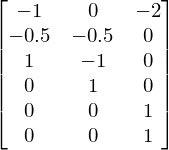

In [14]:
A_bar

In [ ]:
J = r.jacobian(sympy.Matrix([cB,cE,cT,cX, cD, cH]))

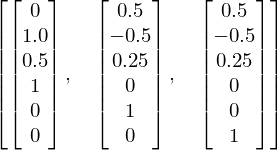

In [36]:
N = (A_bar.T).nullspace()
N

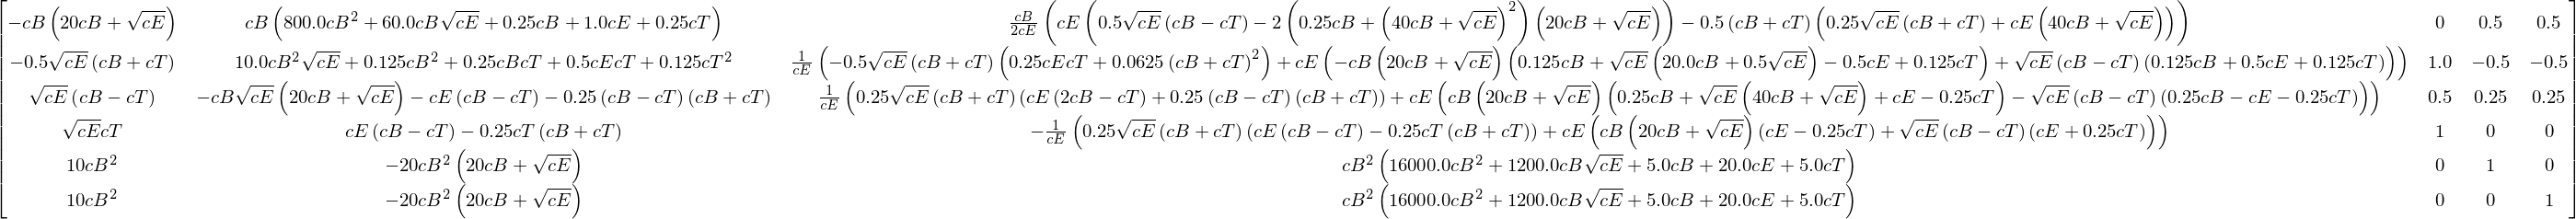

In [40]:
D = sympy.Matrix([r, J*r, J*J*r,N[0],N[1],N[2]])
D = sympy.simplify(sympy.Matrix(6,6,D).T)
D

In [ ]:
#det of a 6x6 matrix takes way too long! compute numerically rather.
#det_fn = sympy.simplify(D.det())
#det_fn

In [11]:
expr_str = sympy.python(phi)
expr_str = expr_str.replace("**","^")
expr_str = expr_str.replace("Float('","")
expr_str = expr_str.replace("', prec=15)","")
expr_str = expr_str.replace("Rational","")
expr_str = expr_str.replace(", ","/")
expr_str = expr_str.replace("c_B", "C(1)")
expr_str = expr_str.replace("c_E", "C(2)")
expr_str = expr_str.replace("c_T", "C(3)")

print expr_str

C(1) = Symbol('C(1)')
C(2) = Symbol('C(2)')
C(3) = Symbol('C(3)')
e = -10*C(1)^3*C(2)^(3/2) - 5.0*C(1)^3*sqrt(C(2))*C(3) - 2.5*C(1)^3*C(3)/sqrt(C(2)) + 2.5*C(1)^3/sqrt(C(2)) + 10*C(1)^2*C(2)^(3/2)*C(3) + 20*C(1)^2*C(2)^(3/2) - 5.0*C(1)^2*sqrt(C(2))*C(3)^2 + 10.0*C(1)^2*sqrt(C(2))*C(3) - 10.0*C(1)^2*sqrt(C(2)) - 2.5*C(1)^2*C(3)^2/sqrt(C(2)) - 2.5*C(1)^2*C(3)/sqrt(C(2)) - 40*C(1)*C(2)^(3/2)*C(3) + 20.0*C(1)*sqrt(C(2))*C(3)^2 + 20.0*C(1)*sqrt(C(2))*C(3) + 1.0*C(1)*C(2)*C(3) - C(2)^2*C(3) + 0.5*C(2)*C(3)^2 - 0.5*C(2)*C(3)
